# Import Libraries

In [403]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Load Dataset

In [404]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

df_train.shape, df_test.shape

((891, 12), (418, 11))

# Sneak Peak into the data

In [405]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [406]:
#df_train['Age'] = df_train['Age'].fillna(df_train['Age'].median())

In [407]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [408]:
df_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [409]:
total_null = df_train.isnull().sum().sort_values(ascending=False)
percent_null = df_train.isnull().sum()/df_train.isnull().count()*100
total_percent = (round(percent_null, 1)).sort_values(ascending=False)

total_missing = pd.concat([total_null, total_percent], axis=1, keys=['Total_null', '% of null'])
total_missing

,Total_null,% of null
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
Fare,0,0.0
Ticket,0,0.0
Parch,0,0.0
SibSp,0,0.0
Sex,0,0.0
Name,0,0.0
Pclass,0,0.0


# EDA/Visualization

male      577
female    314
Name: Sex, dtype: int64


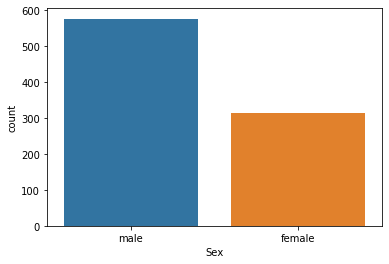

In [410]:
#age count showing there were more female than male on aboard
print(df_train['Sex'].value_counts())
sns.countplot(df_train['Sex'])
plt.show()

0    549
1    342
Name: Survived, dtype: int64


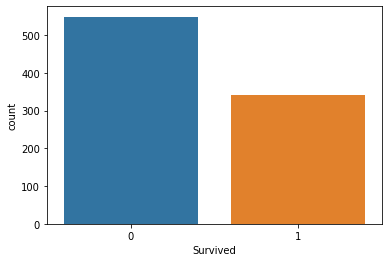

In [411]:
#survival rate
print(df_train['Survived'].value_counts())
sns.countplot(df_train['Survived'])

3    491
1    216
2    184
Name: Pclass, dtype: int64


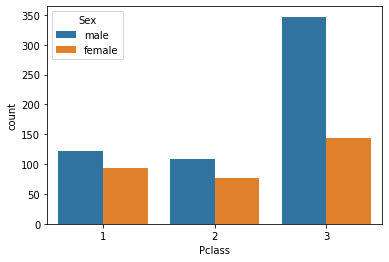

In [412]:
#male had the large number in each class of ticket

print(df_train['Pclass'].value_counts())
df_train['Pclass'].value_counts()
sns.countplot(df_train['Pclass'],data=df_train,hue='Sex')
plt.show()

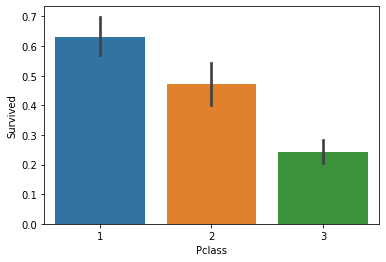

In [413]:
#people contributed to a person's survival as people from 1st class had more survival rate

sns.barplot(x='Pclass', y='Survived', data=df_train)

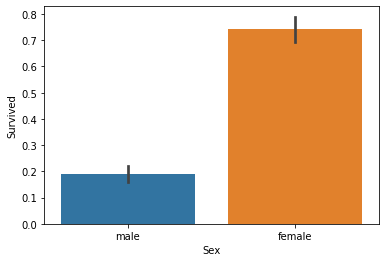

In [414]:
#women had more survival rate than men

sns.barplot(x='Sex',y='Survived',data=df_train)

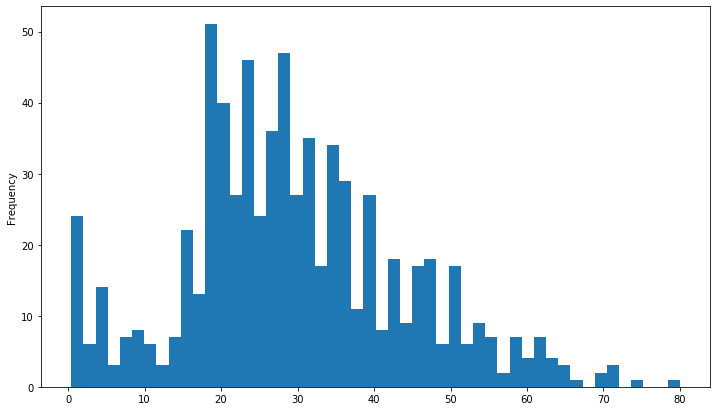

In [415]:
#age distribution showing that the high number of passengers were in their mid 20's and the low number of passenger were in their 70's and 80's
plt.figure(figsize=(12,7))
df_train['Age'].plot.hist(bins=50)
plt.show()

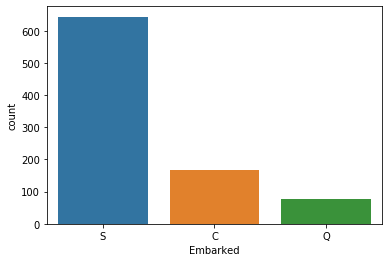

In [416]:
# lot more of the passenger embarked from the 'S' location
sns.countplot(df_train['Embarked'])

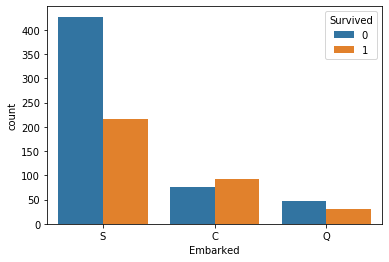

In [417]:
#survival rate fro the embarked variable
sns.countplot(x='Embarked',data=df_train,hue='Survived')

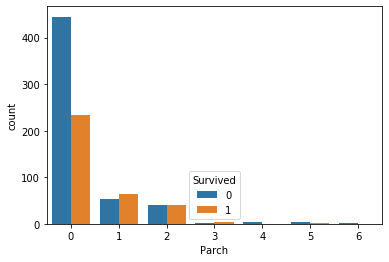

In [418]:
# survival rate for Parch variable
sns.countplot(x='Parch',data=df_train,hue='Survived')

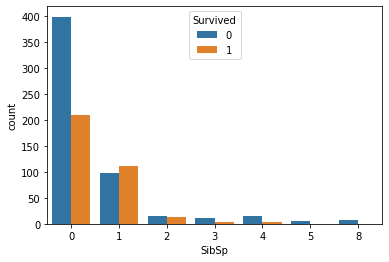

In [419]:
#survival rate for 'Sibsp' variable
df_train['SibSp'].unique()
sns.countplot(x='SibSp',data=df_train,hue='Survived')

# Data preprocessing

In [420]:
#function to assert wether or not a feature has been processed

def status(feature):
    print('processing', feature, ': ok')

In [421]:
#function to merger the two dataset together so as to avoid doing the same data cleaning process twice. 

def join_dataset():
    df_train   #train set
    df_test    #test set
    
    survive = df_train.Survived #extract target variable from the train dataset and drop the target variable
    df_train.drop(['Survived'], axis=1, inplace=True) #droping 'Survived variable from train dataset'
    
    combine = df_train.append(df_test) #join train and test dataset for feature engineering
    combine.reset_index(inplace=True)  #reset the index
    combine.drop(['index','PassengerId'], axis=1, inplace=True)  #drop old index and 'PassengerId from dataset'
    
    return combine

In [422]:
#assign the join_dataset to a variable name
combine = join_dataset()

In [423]:
#shape of the combined dataset
combine.shape

(1309, 10)

In [424]:
combine.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Processing Title variable

In [425]:
#extracting title of passengers to see what different titles are in the dataset
titles = set()
for name in df_train['Name']:
    titles.add(name.split(',')[1].split('.')[0].strip())

In [426]:
#list of titles in the dataset
titles

{'Capt',
 'Col',
 'Don',
 'Dr',
 'Jonkheer',
 'Lady',
 'Major',
 'Master',
 'Miss',
 'Mlle',
 'Mme',
 'Mr',
 'Mrs',
 'Ms',
 'Rev',
 'Sir',
 'the Countess'}

In [427]:
# new title dictionary to be assigned to each name
Title_Dictionary = {
    "Capt": "Officer",
    "Col": "Officer",
    "Major": "Officer",
    "Jonkheer": "Royalty",
    "Don": "Royalty",
    "Sir" : "Royalty",
    "Dr": "Officer",
    "Rev": "Officer",
    "the Countess":"Royalty",
    "Mme": "Mrs",
    "Mlle": "Miss",
    "Ms": "Mrs",
    "Mr" : "Mr",
    "Mrs" : "Mrs",
    "Miss" : "Miss",
    "Master" : "Master",
    "Lady" : "Royalty"
}

def get_titles():
    #extracting the title from each name and assign to a new 'Title' column
    combine['Title'] = combine['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())
    
    
    # map each title from the title dictionary to the new title column
    combine['Title'] = combine.Title.map(Title_Dictionary)
    status('Title')
    return combine

In [428]:
combine = get_titles()

processing Title : ok


In [429]:
combine.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


# process age

In [430]:
#number of missing age from train set

print(combine.iloc[:891].Age.isnull().sum())

177


In [431]:
#number of missing age from test set
print(combine.iloc[891:].Age.isnull().sum())

86


In [432]:
#group the age by sex, Title and passenger class so the missing value can be filled based on the sex, title and Pclass of passenger
group_train = combine.iloc[:891].groupby(['Sex', 'Pclass', 'Title'])

#using median to compute for the missing age
group_median_train = group_train.median()

#reset the index
group_median_train = group_median_train.reset_index()[['Sex', 'Pclass', 'Title', 'Age']]

In [433]:
group_median_train.head()

,Sex,Pclass,Title,Age
0,female,1,Miss,30.0
1,female,1,Mrs,40.0
2,female,1,Officer,49.0
3,female,1,Royalty,40.5
4,female,2,Miss,24.0


In [434]:
#function to fill the missing age with the median value based of on the grouped subset
def fill_age(row):
    condition = (
        (group_median_train['Sex'] == row['Sex']) &
        (group_median_train['Title'] == row['Title']) &
        (group_median_train['Pclass'] == row['Pclass'])
    )
    return group_median_train[condition]['Age'].values[0]

#function to fill the missing age value
def process_age():
    global combine
    combine['Age'] = combine.apply(lambda row: fill_age(row) if np.isnan(row['Age']) else row['Age'], axis=1)
    status('age')
    return combine

In [435]:
combine = process_age()

processing age : ok


# process names

In [436]:
#function to process the name variable
def process_names():
    global combine
    
    #drop the Name variable since it won't be used anymore
    combine.drop('Name', axis=1, inplace=True)
    
    # encoding the title variable and assigning a prefix of 'Title' to it.
    titles_dummies = pd.get_dummies(combine['Title'], prefix='Title')
    
    #join the encoded variable to the rest of the dataset
    combine = pd.concat([combine, titles_dummies], axis=1)
    
    # drop the title variable
    combine.drop('Title', axis=1, inplace=True)
    
    status('names')
    return combine

In [437]:
combine = process_names()

processing names : ok


In [438]:
combine.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty
0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0,0,0
1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,0,0,0,1,0,0
2,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0,0,0,0
3,1,female,35.0,1,0,113803,53.1000,C123,S,0,0,0,1,0,0
4,3,male,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0,0,0


# process Fares

In [439]:
#function to process the fair variable
def process_fares():
    global combine
    
    #replacing the missing fare value with the mean
    combine['Fare'].fillna(combine.iloc[:891].Fare.mean(), inplace=True)
    status('fare')
    return combine

In [440]:
combine = process_fares()

processing fare : ok


# processing embarked

In [441]:
#function to process the embark variable
def process_embarked():
    global combine
    
    #filling the missing embark values with the most frequest value which is 'S'
    combine['Embarked'].fillna('S', inplace=True)
    
    # encoding categorical values and assigning a prefix
    embarked_dummies = pd.get_dummies(combine['Embarked'], prefix='Embarked')
    
    #join the encoded variables to the rest of the dataset
    combine = pd.concat([combine, embarked_dummies], axis=1)
    
    #drop Embarked column
    combine.drop('Embarked', axis=1, inplace=True)
    status('embarked')
    return combine

In [442]:
combine = process_embarked()

processing embarked : ok


In [443]:
combine.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,Embarked_C,Embarked_Q,Embarked_S
0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1,0,0,0,0,0,1
1,1,female,38.0,1,0,PC 17599,71.2833,C85,0,0,0,1,0,0,1,0,0
2,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1,0,0,0,0,0,0,1
3,1,female,35.0,1,0,113803,53.1000,C123,0,0,0,1,0,0,0,0,1
4,3,male,35.0,0,0,373450,8.0500,NaN,0,0,1,0,0,0,0,0,1


# processing cabin

In [444]:
cabin_train, cabin_test = set(), set()

for c in combine.iloc[:891]['Cabin']:
    try:
        cabin_train.add(c[0])
    except:
        cabin_train.add('U')
        
for c in combine.iloc[891:]['Cabin']:
    try:
        cabin_test.add(c[0])
    except:
        cabin_test.add('U')

In [445]:
print(cabin_train)

{'G', 'E', 'C', 'B', 'F', 'D', 'T', 'U', 'A'}


In [446]:
print (cabin_test)

{'E', 'G', 'C', 'B', 'F', 'D', 'U', 'A'}


In [447]:
def process_cabin():
    global combine
    #replace missing cabin values with U
    combine.Cabin.fillna('U', inplace=True)
    
    #mapping each cabin value with the cabin letter
    combine['Cabin'] = combine['Cabin'].map(lambda c: c[0])
    
    #dummy encoding
    cabin_dummies = pd.get_dummies(combine['Cabin'], prefix='Cabin')
    combine = pd.concat([combine, cabin_dummies], axis=1)
    
    combine.drop('Cabin', axis=1, inplace=True)
    status('cabin')
    return combine

In [448]:
combine = process_cabin()

processing cabin : ok


In [449]:
combine.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Title_Master,Title_Miss,Title_Mr,...,Embarked_S,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U
0,3,male,22.0,1,0,A/5 21171,7.2500,0,0,1,...,1,0,0,0,0,0,0,0,0,1
1,1,female,38.0,1,0,PC 17599,71.2833,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,3,female,26.0,0,0,STON/O2. 3101282,7.9250,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3,1,female,35.0,1,0,113803,53.1000,0,0,0,...,1,0,0,1,0,0,0,0,0,0
4,3,male,35.0,0,0,373450,8.0500,0,0,1,...,1,0,0,0,0,0,0,0,0,1


# processing sex

In [450]:
#function to process sex column
def process_sex():
    global combine
    #mapping string values to numerical 
    combine['Sex'] = combine['Sex'].map({'male':1, 'female':0})
    status('Sex')
    return combine

In [451]:
combine = process_sex()

processing Sex : ok


# processing Pclass

In [452]:
#function to process pclass
def process_Pclass():
    global combine
    #encoding the categorical values to numbers
    pclass_dummies = pd.get_dummies(combine['Pclass'],prefix='Pclass')
    #joining the Pclass dummy variables to the dataset
    combine = pd.concat([combine, pclass_dummies],axis=1)
    #drop the original Pclass variable
    combine.drop('Pclass', axis=1,inplace=True)
    
    status('Pclass')
    return combine

In [453]:
combine = process_Pclass()

processing Pclass : ok


# Processing ticket

In [454]:
#function to process ticket
def cleanTicket(ticket):
    ticket = ticket.replace('.','')
    ticket = ticket.replace('/','')
    ticket = ticket.split()
    ticket = map(lambda t : t.strip(), ticket)
    ticket = list(filter(lambda t : not t.isdigit(), ticket))
    if len(ticket) > 0:
        return ticket[0]
    else:
        return 'XXX'

In [455]:
tickets = set()
for t in combine['Ticket']:
    tickets.add(cleanTicket(t))

In [456]:
#print lenght of ticket
print(len(tickets))

37


In [457]:
def process_ticket():
    global combine
    # a function that extracts each prefix of the ticket, returns 'XXX' if no prefix (i.e the ticket is a digit)
    
    def cleanTicket(ticket):
        ticket = ticket.replace('.','')
        ticket = ticket.replace('/','')
        ticket = ticket.split()
        ticket = map(lambda t : t.strip(), ticket)
        ticket = list(filter(lambda t : not t.isdigit(), ticket))
        if len(ticket) > 0:
            return ticket[0]
        else:
            return 'XXX'
    
    
    #extract dummy variables from tickets.
    
    combine['Ticket'] = combine['Ticket'].map(cleanTicket)
    tickets_dummies = pd.get_dummies(combine['Ticket'], prefix='Ticket')
    combine = pd.concat([combine, tickets_dummies], axis=1)
    combine.drop('Ticket', inplace=True, axis=1)
    
    status('Ticket')
    return combine

In [458]:
combine = process_ticket()

processing Ticket : ok


# Process Family

In [462]:
#function to process family variable
def process_family():
    global combine
    # introducing a new feature : the size of families (including the passenger)
    combine['FamilySize'] = combine['Parch'] + combine['SibSp'] + 1
    
    # introducing other features based on the family size
    combine['Singleton'] = combine['FamilySize'].map(lambda s: 1 if s== 1 else 0)
    combine['SmallFamily'] = combine['FamilySize'].map(lambda s: 1 if 2 <= s <= 4 else 0)
    combine['LargeFamily'] = combine['FamilySize'].map(lambda s: 1 if 5 <= s else 0)
    
    status('family')
    return combine
    

In [463]:
combine = process_family()

processing family : ok


In [465]:
# the total shape of the entire dataset after processing
print(combine.shape)

(1309, 67)


In [466]:
combine.head()

,Sex,Age,SibSp,Parch,Fare,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,...,Ticket_STONO2,Ticket_STONOQ,Ticket_SWPP,Ticket_WC,Ticket_WEP,Ticket_XXX,FamilySize,Singleton,SmallFamily,LargeFamily
0,1,22.0,1,0,7.2500,0,0,1,0,0,...,0,0,0,0,0,0,2,0,1,0
1,0,38.0,1,0,71.2833,0,0,0,1,0,...,0,0,0,0,0,0,2,0,1,0
2,0,26.0,0,0,7.9250,0,1,0,0,0,...,1,0,0,0,0,0,1,1,0,0
3,0,35.0,1,0,53.1000,0,0,0,1,0,...,0,0,0,0,0,1,2,0,1,0
4,1,35.0,0,0,8.0500,0,0,1,0,0,...,0,0,0,0,0,1,1,1,0,0


# Model building

In [467]:
#import libraries

from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble.gradient_boosting import GradientBoostingClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV 


import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [469]:
#function that does the scoring
def compute_score(clf, X, y, scoring='accuracy'):
    xval = cross_val_score(clf, X, y, cv=5, scoring=scoring)
    return np.mean(xval)

In [470]:
#function to recover train and test dataset
def recover_train_test_target():
    global combine
    
    targets = pd.read_csv('train.csv', usecols=['Survived'])['Survived'].values
    train = combine.iloc[:891]
    test = combine.iloc[891:]
    
    return train, test, targets

In [471]:
print(train.shape, test.shape, targets.shape)

(891, 67) (418, 67) (891,)


# Feature Selection

In [477]:
#instantiate the RandomForestClassifier and fit it on the train and target set
clf = RandomForestClassifier(n_estimators=50, max_features='sqrt')
clf = clf.fit(train, targets)

In [478]:
features = pd.DataFrame()
features['feature'] = train.columns
features['importance'] = clf.feature_importances_
features.sort_values(by=['importance'], ascending=True, inplace=True)
features.set_index('feature', inplace=True)

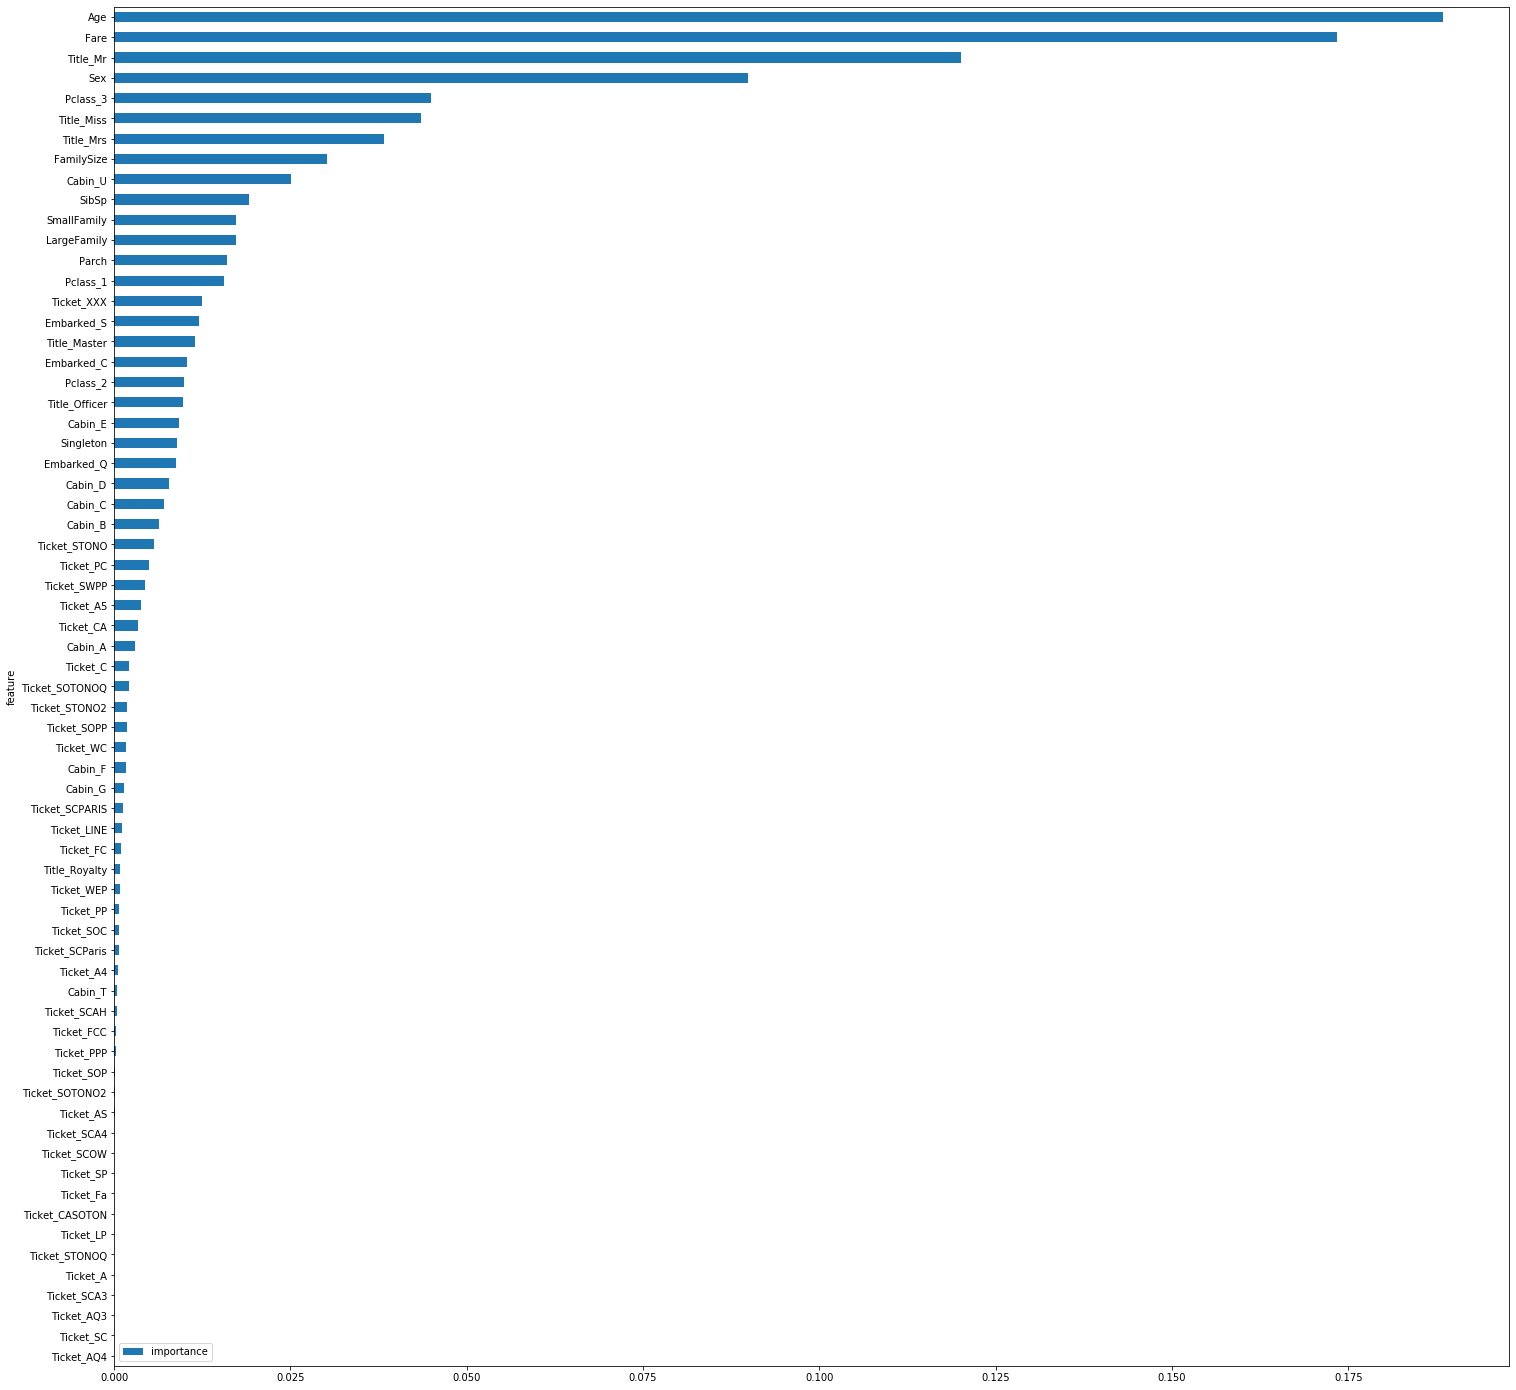

In [479]:
#plot a barchat of feature importance
features.plot(kind='barh', figsize=(25, 25))

###### from the plot we can see that there is great importance linked to Title_Mr, Age, Fare and Sex

In [482]:
#transform the train set into a more compact dataset
model = SelectFromModel(clf, prefit=True)
train_reduce = model.transform(train)
print(train_reduce.shape)

(891, 14)


In [483]:
#transform the test set into a more compact dataset
test_reduce = model.transform(test)
print(test_reduce.shape)

(418, 14)


In [484]:
# trying different models
logreg = LogisticRegression()
logreg_cv = LogisticRegressionCV()
rf = RandomForestClassifier()
gboost = GradientBoostingClassifier()

models = [logreg, logreg_cv, rf, gboost]

In [485]:
 for model in models:
    print('Cross-validation of : {0}'.format(model.__class__))
    score = compute_score(clf=model, X=train_reduce, y=targets, scoring='accuracy')
    print('CV score = {0}'.format(score))

Cross-validation of : <class 'sklearn.linear_model._logistic.LogisticRegression'>
CV score = 0.8170547988199109
Cross-validation of : <class 'sklearn.linear_model._logistic.LogisticRegressionCV'>
CV score = 0.8215366267026551
Cross-validation of : <class 'sklearn.ensemble._forest.RandomForestClassifier'>
CV score = 0.8181909484652564
Cross-validation of : <class 'sklearn.ensemble._gb.GradientBoostingClassifier'>
CV score = 0.830525390747599


# Hyperparameter tuning

In [486]:
run_gs = True

if run_gs:
    parameter_grid = {
                'max_depth':[4,6,8],
                'n_estimators':[50,10],
                'max_features':['sqrt','auto','log2'],
                'min_samples_split':[2,3,10],
                'min_samples_leaf':[1,3,10],
                'bootstrap':[True, False]
                }
    forest = RandomForestClassifier()
    cross_validation = StratifiedKFold(n_splits=5)
    
    grid_search = GridSearchCV(forest,
                              scoring='accuracy',
                              param_grid=parameter_grid,
                              cv=cross_validation,
                              verbose=1
                              )
    
    grid_search.fit(train, targets)
    model = grid_search
    parameters = grid_search.best_params_
    
    print('Best score: {}'.format(grid_search.best_score_))
    print('Best parameters: {}'.format(grid_search.best_params_))
    
else:
    parameters = {'bootstrap': False, 'min_samples_leaf': 3, 'n_estimators': 50, 'min_samples_split': 10, 'max_features': 'sqrt', 'max_depth': 6}
    model = RandomForestClassifier(**parameters)
    model.fit(train, targets)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1620 out of 1620 | elapsed:  2.6min finished


Best score: 0.8372669637813068
Best parameters: {'bootstrap': False, 'max_depth': 6, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 10}
